#Feature Engineering

Dataset: https://raw.githubusercontent.com/thiagonogueira/datasets/main/feature_engineering_dataset.txt

Dictionary:
https://github.com/thiagonogueira/datasets/blob/main/feature_engineering_descritivo_caracter%C3%ADsticas.xlsx

##Imports

In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


In [ ]:
#Upload files, selecting the training dataset
#Download Dataset from this link (TRAIN base in use only) https://www.kaggle.com/datasets/parisrohan/credit-score-classification?resource=download
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dataset.txt to dataset.txt
User uploaded file "dataset.txt" with length 8394950 bytes


In [ ]:
# List of all columns we want to include
columns = ["ID_CLIENTE", "TIPO_FUNCIONARIO", "DIA_PAGAMENTO", "TIPO_ENVIO_APLICACAO", "QUANT_CARTOES_ADICIONAIS",
           "TIPO_ENDERECO_POSTAL", "SEXO", "ESTADO_CIVIL", "QUANT_DEPENDENTES", "NIVEL_EDUCACIONAL",
           "ESTADO_NASCIMENTO", "CIDADE_NASCIMENTO", "NACIONALIDADE", "ESTADO_RESIDENCIAL", "CIDADE_RESIDENCIAL",
           "BAIRRO_RESIDENCIAL", "FLAG_TELEFONE_RESIDENCIAL", "CODIGO_AREA_TELEFONE_RESIDENCIAL",
           "TIPO_RESIDENCIA", "MESES_RESIDENCIA", "FLAG_TELEFONE_MOVEL", "FLAG_EMAIL", "RENDA_PESSOAL_MENSAL",
           "OUTRAS_RENDAS", "FLAG_VISA", "FLAG_MASTERCARD", "FLAG_DINERS", "FLAG_AMERICAN_EXPRESS",
           "FLAG_OUTROS_CARTOES", "QUANT_CONTAS_BANCARIAS", "QUANT_CONTAS_BANCARIAS_ESPECIAIS",
           "VALOR_PATRIMONIO_PESSOAL", "QUANT_CARROS", "EMPRESA", "ESTADO_PROFISSIONAL", "CIDADE_PROFISSIONAL",
           "BAIRRO_PROFISSIONAL", "FLAG_TELEFONE_PROFISSIONAL", "CODIGO_AREA_TELEFONE_PROFISSIONAL",
           "MESES_NO_TRABALHO", "CODIGO_PROFISSAO", "TIPO_OCUPACAO", "CODIGO_PROFISSAO_CONJUGE",
           "NIVEL_EDUCACIONAL_CONJUGE", "FLAG_DOCUMENTO_RESIDENCIAL", "FLAG_RG", "FLAG_CPF",
           "FLAG_COMPROVANTE_RENDA", "PRODUTO", "FLAG_REGISTRO_ACSP", "IDADE", "CEP_RESIDENCIAL_3",
           "CEP_PROFISSIONAL_3", "ROTULO_ALVO_MAU"]

score = pd.read_csv("dataset.txt", sep='\t', encoding='ISO-8859-1', names=columns)

# Viewing the first few lines
score.head()

<ipython-input-4-ea0521d75c09>:16: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  score = pd.read_csv("dataset.txt", sep='\t', encoding='ISO-8859-1', names=colunas)


,ID_CLIENTE,TIPO_FUNCIONARIO,DIA_PAGAMENTO,TIPO_ENVIO_APLICACAO,QUANT_CARTOES_ADICIONAIS,TIPO_ENDERECO_POSTAL,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,...,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG_REGISTRO_ACSP,IDADE,CEP_RESIDENCIAL_3,CEP_PROFISSIONAL_3,ROTULO_ALVO_MAU
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


##First test of the database
Initial tests without manipulation to get to know the base

In [ ]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID_CLIENTE                         50000 non-null  int64  
 1   TIPO_FUNCIONARIO                   50000 non-null  object 
 2   DIA_PAGAMENTO                      50000 non-null  int64  
 3   TIPO_ENVIO_APLICACAO               50000 non-null  object 
 4   QUANT_CARTOES_ADICIONAIS           50000 non-null  int64  
 5   TIPO_ENDERECO_POSTAL               50000 non-null  int64  
 6   SEXO                               50000 non-null  object 
 7   ESTADO_CIVIL                       50000 non-null  int64  
 8   QUANT_DEPENDENTES                  50000 non-null  int64  
 9   NIVEL_EDUCACIONAL                  50000 non-null  int64  
 10  ESTADO_NASCIMENTO                  50000 non-null  object 
 11  CIDADE_NASCIMENTO                  50000 non-null  obj

Selecting only non-categorical columns to apply KNN

In [ ]:
categorical_columns = score.select_dtypes(exclude='object').columns

# Remove categorical columns
score_2 = score.copy()
score_2 = score_2[categorical_columns]

In [ ]:
score_2.isnull().sum()

ID_CLIENTE                              0
DIA_PAGAMENTO                           0
QUANT_CARTOES_ADICIONAIS                0
TIPO_ENDERECO_POSTAL                    0
ESTADO_CIVIL                            0
QUANT_DEPENDENTES                       0
NIVEL_EDUCACIONAL                       0
NACIONALIDADE                           0
TIPO_RESIDENCIA                      1349
MESES_RESIDENCIA                     3777
FLAG_EMAIL                              0
RENDA_PESSOAL_MENSAL                    0
OUTRAS_RENDAS                           0
FLAG_VISA                               0
FLAG_MASTERCARD                         0
FLAG_DINERS                             0
FLAG_AMERICAN_EXPRESS                   0
FLAG_OUTROS_CARTOES                     0
QUANT_CONTAS_BANCARIAS                  0
QUANT_CONTAS_BANCARIAS_ESPECIAIS        0
VALOR_PATRIMONIO_PESSOAL                0
QUANT_CARROS                            0
MESES_NO_TRABALHO                       0
CODIGO_PROFISSAO                  

Let's remove the columns that have null data to be able to run the model.

In [ ]:
# Columns to be removed
remove_columns = ["ID_CLIENTE", "TIPO_RESIDENCIA", "MESES_RESIDENCIA",
                   "CODIGO_PROFISSAO", "TIPO_OCUPACAO",
                   "CODIGO_PROFISSAO_CONJUGE", "NIVEL_EDUCACIONAL_CONJUGE"]

# Removing the columns
score_clean_dataset = score_2.drop(columns=remove_columns)

In [ ]:
score_clean_dataset.head()

,DIA_PAGAMENTO,QUANT_CARTOES_ADICIONAIS,TIPO_ENDERECO_POSTAL,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,NACIONALIDADE,FLAG_EMAIL,RENDA_PESSOAL_MENSAL,OUTRAS_RENDAS,...,VALOR_PATRIMONIO_PESSOAL,QUANT_CARROS,MESES_NO_TRABALHO,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,IDADE,ROTULO_ALVO_MAU
0,5,0,1,6,1,0,1,1,900.0,0.0,...,0.0,0,0,0,0,0,0,1,32,1
1,15,0,1,2,0,0,1,1,750.0,0.0,...,0.0,0,0,0,0,0,0,1,34,1
2,5,0,1,2,0,0,1,1,500.0,0.0,...,0.0,0,0,0,0,0,0,1,27,0
3,20,0,1,2,0,0,1,1,500.0,0.0,...,0.0,0,0,0,0,0,0,1,61,0
4,10,0,1,2,0,0,1,1,1200.0,0.0,...,0.0,0,0,0,0,0,0,1,48,1


Normalizing the dataset to handle columns that are at different scales

In [ ]:
scaler = StandardScaler()
scaler.fit(score_clean_dataset.drop('ROTULO_ALVO_MAU',axis=1))

StandardScaler()

In [ ]:
scaled_features = scaler.transform(score_clean_dataset.drop('ROTULO_ALVO_MAU',axis=1))

In [ ]:
score_standard = pd.DataFrame(scaled_features,columns=score_clean_dataset.columns[:-1])
score_standard.head()

,DIA_PAGAMENTO,QUANT_CARTOES_ADICIONAIS,TIPO_ENDERECO_POSTAL,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,NACIONALIDADE,FLAG_EMAIL,RENDA_PESSOAL_MENSAL,OUTRAS_RENDAS,...,QUANT_CONTAS_BANCARIAS_ESPECIAIS,VALOR_PATRIMONIO_PESSOAL,QUANT_CARROS,MESES_NO_TRABALHO,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,IDADE
0,-1.190911,0.0,-0.081136,2.911621,0.292784,0.0,0.190003,0.496435,0.001698,-0.039747,...,-0.74558,-0.054828,-0.711577,-0.024306,0.0,0.0,0.0,0.0,-0.278971,-0.750457
1,0.322333,0.0,-0.081136,-0.112183,-0.544987,0.0,0.190003,0.496435,-0.017418,-0.039747,...,-0.74558,-0.054828,-0.711577,-0.024306,0.0,0.0,0.0,0.0,-0.278971,-0.617025
2,-1.190911,0.0,-0.081136,-0.112183,-0.544987,0.0,0.190003,0.496435,-0.049278,-0.039747,...,-0.74558,-0.054828,-0.711577,-0.024306,0.0,0.0,0.0,0.0,-0.278971,-1.084037
3,1.078955,0.0,-0.081136,-0.112183,-0.544987,0.0,0.190003,0.496435,-0.049278,-0.039747,...,-0.74558,-0.054828,-0.711577,-0.024306,0.0,0.0,0.0,0.0,-0.278971,1.184308
4,-0.434289,0.0,-0.081136,-0.112183,-0.544987,0.0,0.190003,0.496435,0.039929,-0.039747,...,-0.74558,-0.054828,-0.711577,-0.024306,0.0,0.0,0.0,0.0,-0.278971,0.317000


KNN model training

In [ ]:
X = score_standard
y = score_clean_dataset['ROTULO_ALVO_MAU']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.74      0.88      0.81     11076
           1       0.30      0.14      0.19      3924

    accuracy                           0.69     15000
   macro avg       0.52      0.51      0.50     15000
weighted avg       0.63      0.69      0.65     15000



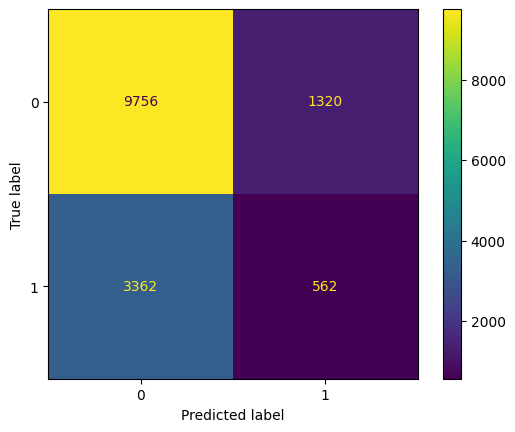

In [ ]:
metric_filter=confusion_matrix(y_test,y_pred)

print (classification_report(y_test, y_pred))

cm = confusion_matrix( y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

**Analysis of the initial result**

---

Apparently the dataset is unbalanced, which causes the model to classify most of the tests as bad payers

##Applying Feature Engineering techniques to clean the database

**Cleaning the database** - After studying the dataset, I decided to delete some columns that I considered unnecessary or redundant.

In [ ]:
# Columns to be removed
remove_columns = ["ID_CLIENTE", "ESTADO_CIVIL", "TIPO_FUNCIONARIO", "QUANT_CARTOES_ADICIONAIS", "NIVEL_EDUCACIONAL",
                   "ESTADO_NASCIMENTO", "CIDADE_NASCIMENTO", "CIDADE_RESIDENCIAL", "BAIRRO_RESIDENCIAL",
                   "CODIGO_AREA_TELEFONE_RESIDENCIAL", "FLAG_TELEFONE_MOVEL", "OUTRAS_RENDAS", "VALOR_PATRIMONIO_PESSOAL",
                   "EMPRESA", "ESTADO_PROFISSIONAL", "CIDADE_PROFISSIONAL", "BAIRRO_PROFISSIONAL", "FLAG_TELEFONE_PROFISSIONAL",
                   "CODIGO_AREA_TELEFONE_PROFISSIONAL", "MESES_NO_TRABALHO", "CODIGO_PROFISSAO_CONJUGE", "NIVEL_EDUCACIONAL_CONJUGE",
                   "FLAG_DOCUMENTO_RESIDENCIAL", "FLAG_RG", "FLAG_CPF", "FLAG_COMPROVANTE_RENDA", "FLAG_REGISTRO_ACSP", "CEP_RESIDENCIAL_3",
                   "CEP_PROFISSIONAL_3", "CODIGO_PROFISSAO", "TIPO_OCUPACAO", "TIPO_RESIDENCIA"]

# Creating a new dataset without unnecessary columns
score_clean_dataset_2 = score.copy()
score_clean_dataset_2 = score_clean_dataset_2.drop(columns=remove_columns)

In [ ]:
score_clean_dataset_2

,DIA_PAGAMENTO,TIPO_ENVIO_APLICACAO,TIPO_ENDERECO_POSTAL,SEXO,QUANT_DEPENDENTES,NACIONALIDADE,ESTADO_RESIDENCIAL,FLAG_TELEFONE_RESIDENCIAL,MESES_RESIDENCIA,FLAG_EMAIL,...,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OUTROS_CARTOES,QUANT_CONTAS_BANCARIAS,QUANT_CONTAS_BANCARIAS_ESPECIAIS,QUANT_CARROS,PRODUTO,IDADE,ROTULO_ALVO_MAU
0,5,Web,1,F,1,1,RN,Y,15.0,1,...,1,0,0,0,0,0,0,1,32,1
1,15,Carga,1,F,0,1,RJ,Y,1.0,1,...,0,0,0,0,0,0,0,1,34,1
2,5,Web,1,F,0,1,RN,Y,NaN,1,...,0,0,0,0,0,0,0,1,27,0
3,20,Web,1,F,0,1,PE,N,NaN,1,...,0,0,0,0,0,0,0,1,61,0
4,10,Web,1,M,0,1,RJ,Y,12.0,1,...,0,0,0,0,0,0,0,1,48,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,10,0,1,F,2,1,RN,Y,14.0,1,...,0,0,0,0,1,1,1,1,36,1
49996,25,0,1,F,0,1,SP,Y,15.0,1,...,0,0,0,0,0,0,0,2,21,0
49997,5,Web,1,M,3,1,SP,Y,5.0,1,...,0,0,0,0,0,0,0,1,41,0
49998,1,Web,1,F,1,1,MG,Y,NaN,1,...,0,0,0,0,0,0,0,1,28,1


Limpando as colunas com dados diferentes do esperado

In [ ]:
#Removing lines that have unknown gender
score_clean_dataset_2 = score_clean_dataset_2.loc[(score_clean_dataset_2['SEXO'] != ' ') & (score_clean_dataset_2['SEXO'] != 'N')]

#Standardizing shipping types such as Physical or Web
score_clean_dataset_2['TIPO_ENVIO_APLICACAO'] = score_clean_dataset_2['TIPO_ENVIO_APLICACAO'].apply(lambda x: 'físico' if x != 'Web' else x)

#Filling the null fields of the months of residence with the average
score_clean_dataset_2['MESES_RESIDENCIA'] = score_clean_dataset_2['MESES_RESIDENCIA'].fillna(score_clean_dataset_2['MESES_RESIDENCIA'].mean())

#Removing outlier with QUANT_DEPENDENTES Inconsistent
score_clean_dataset_2 = score_clean_dataset_2.loc[score_clean_dataset_2['QUANT_DEPENDENTES'] != 53] #outlier

<ipython-input-23-72f74a142d2d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_base_limpa['TIPO_ENVIO_APLICACAO'] = score_base_limpa['TIPO_ENVIO_APLICACAO'].apply(lambda x: 'físico' if x != 'Web' else x)
<ipython-input-23-72f74a142d2d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_base_limpa['MESES_RESIDENCIA'] = score_base_limpa['MESES_RESIDENCIA'].fillna(score_base_limpa['MESES_RESIDENCIA'].mean())


Verificando se ainda temos campos nulos

In [ ]:
score_clean_dataset_2.isna().sum()

DIA_PAGAMENTO                       0
TIPO_ENVIO_APLICACAO                0
TIPO_ENDERECO_POSTAL                0
SEXO                                0
QUANT_DEPENDENTES                   0
NACIONALIDADE                       0
ESTADO_RESIDENCIAL                  0
FLAG_TELEFONE_RESIDENCIAL           0
MESES_RESIDENCIA                    0
FLAG_EMAIL                          0
RENDA_PESSOAL_MENSAL                0
FLAG_VISA                           0
FLAG_MASTERCARD                     0
FLAG_DINERS                         0
FLAG_AMERICAN_EXPRESS               0
FLAG_OUTROS_CARTOES                 0
QUANT_CONTAS_BANCARIAS              0
QUANT_CONTAS_BANCARIAS_ESPECIAIS    0
QUANT_CARROS                        0
PRODUTO                             0
IDADE                               0
ROTULO_ALVO_MAU                     0
dtype: int64

In [ ]:
target = score_clean_dataset_2['ROTULO_ALVO_MAU']

#remove Target from the dataset
score_clean_dataset_2 = score_clean_dataset_2.drop('ROTULO_ALVO_MAU',axis=1)

Convertendo variaveis categóricas com one-hot-enconding

In [ ]:
sexo = pd.get_dummies(score_clean_dataset_2['SEXO'],drop_first=True).astype(int)
tipo_env = pd.get_dummies(score_clean_dataset_2['TIPO_ENVIO_APLICACAO'],drop_first=True).astype(int)
flag_tel_res = pd.get_dummies(score_clean_dataset_2['FLAG_TELEFONE_RESIDENCIAL'],drop_first=True).astype(int)
uf = pd.get_dummies(score_clean_dataset_2['ESTADO_RESIDENCIAL'],drop_first=True).astype(int)

score_base_dummy = pd.concat([score_clean_dataset_2, sexo, tipo_env, flag_tel_res, uf],axis=1)

#Excluding categorical variables
score_base_dummy.drop(['SEXO', 'TIPO_ENVIO_APLICACAO', 'FLAG_TELEFONE_RESIDENCIAL', 'ESTADO_RESIDENCIAL'],axis=1,inplace=True)
score_base_dummy.head()

,DIA_PAGAMENTO,TIPO_ENDERECO_POSTAL,QUANT_DEPENDENTES,NACIONALIDADE,MESES_RESIDENCIA,FLAG_EMAIL,RENDA_PESSOAL_MENSAL,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,5,1,1,1,15.000000,1,900.0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,15,1,0,1,1.000000,1,750.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,5,1,0,1,9.726251,1,500.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,20,1,0,1,9.726251,1,500.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,1,0,1,12.000000,1,1200.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


##Base balance analysis
Now with the base clean, let's **analyze whether the base is balanced**

In [ ]:
np.random.seed(42)
target.value_counts()

ROTULO_ALVO_MAU
0    36916
1    13018
Name: count, dtype: int64

**Analysis result** - There is much more data labeled with 0 than 1, this imbalance produces a negative effect on model training, let's balance the dataset before performing training

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

X = score_base_dummy
y = target

# Setting the seed
np.random.seed(42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# The result is a balanced dataset
score_base_dummy_resampled = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res, columns=['ROTULO_ALVO_MAU'])], axis=1)

# Checking the new class distribution
print(score_base_dummy_resampled['ROTULO_ALVO_MAU'].value_counts())

ROTULO_ALVO_MAU
1    36916
0    36916
Name: count, dtype: int64


**Resultado** - A base está balanceada

In [ ]:
target = score_base_dummy_resampled['ROTULO_ALVO_MAU']

#remove Target from the dataset
score_base_dummy_resampled = score_base_dummy_resampled.drop('ROTULO_ALVO_MAU',axis=1)

In [ ]:
score_base_dummy_resampled.head()

,DIA_PAGAMENTO,TIPO_ENDERECO_POSTAL,QUANT_DEPENDENTES,NACIONALIDADE,MESES_RESIDENCIA,FLAG_EMAIL,RENDA_PESSOAL_MENSAL,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,5,1,1,1,15.000000,1,900.0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,15,1,0,1,1.000000,1,750.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,5,1,0,1,9.726251,1,500.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,20,1,0,1,9.726251,1,500.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,1,0,1,12.000000,1,1200.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


##Dataset normalization

Standardization of the training dataset to prevent problems with different scales

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(score_base_dummy_resampled)

StandardScaler()

In [ ]:
scaled_features = scaler.transform(score_base_dummy_resampled)
score_base_dummy_resampled_scaled = pd.DataFrame(scaled_features,columns=score_base_dummy_resampled.columns[:])

In [ ]:
score_base_dummy_resampled_scaled.head()

,DIA_PAGAMENTO,TIPO_ENDERECO_POSTAL,QUANT_DEPENDENTES,NACIONALIDADE,MESES_RESIDENCIA,FLAG_EMAIL,RENDA_PESSOAL_MENSAL,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,-1.218826,-0.066801,0.401700,0.219007,0.544156,0.56759,0.006345,3.389469,3.674569,-0.029912,...,-0.145905,-0.175086,5.860309,-0.070583,-0.028756,-0.284263,-0.095768,-0.061478,-0.389256,-0.04216
1,0.288987,-0.066801,-0.524717,0.219007,-0.841795,0.56759,-0.015969,-0.295031,-0.272141,-0.029912,...,-0.145905,5.711491,-0.170639,-0.070583,-0.028756,-0.284263,-0.095768,-0.061478,-0.389256,-0.04216
2,-1.218826,-0.066801,-0.524717,0.219007,0.022073,0.56759,-0.053158,-0.295031,-0.272141,-0.029912,...,-0.145905,-0.175086,5.860309,-0.070583,-0.028756,-0.284263,-0.095768,-0.061478,-0.389256,-0.04216
3,1.042893,-0.066801,-0.524717,0.219007,0.022073,0.56759,-0.053158,-0.295031,-0.272141,-0.029912,...,-0.145905,-0.175086,-0.170639,-0.070583,-0.028756,-0.284263,-0.095768,-0.061478,-0.389256,-0.04216
4,-0.464920,-0.066801,-0.524717,0.219007,0.247167,0.56759,0.050973,-0.295031,-0.272141,-0.029912,...,-0.145905,5.711491,-0.170639,-0.070583,-0.028756,-0.284263,-0.095768,-0.061478,-0.389256,-0.04216


##Second test of the database

After cleaning the dataset and normalizing the data, I will choose the K that I will use through the "elbow method" and then apply the KNN

Separation of test and training base

In [ ]:
X = score_base_dummy_resampled_scaled.copy()
y = target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)

In [ ]:
y_train.value_counts()

ROTULO_ALVO_MAU
0    25870
1    25812
Name: count, dtype: int64

**Elbow method** - Technique used to define the best K to apply in KNN

In [ ]:
error_rate = []

# It may take at least 4min
for i in range(1,30):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Taxa de Erro')

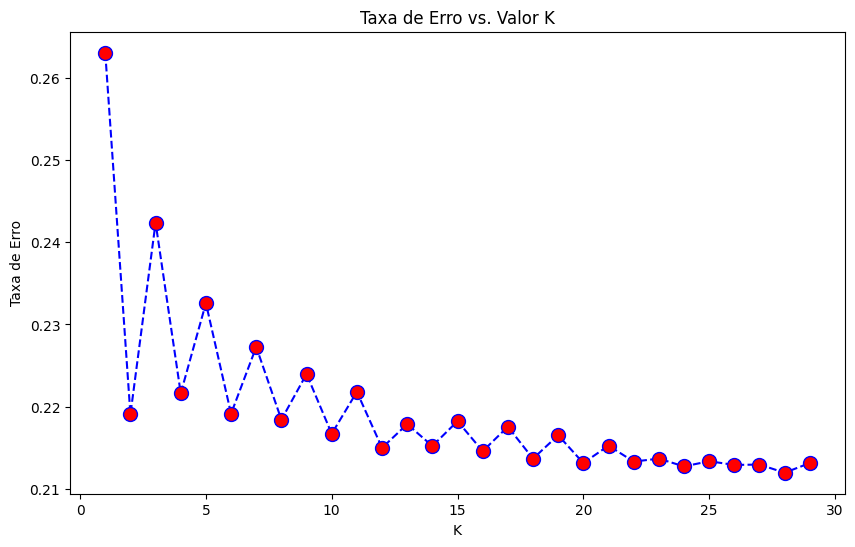

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**KNN** - To minimize the error rate I chose K = 20

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_pred = knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.71      0.96      0.82     11046
           1       0.93      0.62      0.74     11104

    accuracy                           0.79     22150
   macro avg       0.82      0.79      0.78     22150
weighted avg       0.82      0.79      0.78     22150



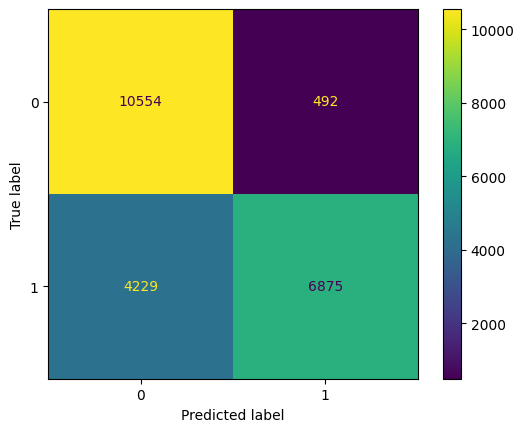

In [ ]:
metric_filter=confusion_matrix(y_test,y_pred)

print (classification_report(y_test, y_pred))

cm = confusion_matrix( y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()